# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [11]:
# Run API to check output and confirm key works
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
city = "perth"
city_url = url + "&q=" + city
city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': 115.8333, 'lat': -31.9333},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 22.36,
  'feels_like': 22.22,
  'temp_min': 21.07,
  'temp_max': 23.35,
  'pressure': 1009,
  'humidity': 60},
 'visibility': 10000,
 'wind': {'speed': 5.66, 'deg': 250},
 'clouds': {'all': 75},
 'dt': 1667886013,
 'sys': {'type': 2,
  'id': 63154,
  'country': 'AU',
  'sunrise': 1667855628,
  'sunset': 1667904420},
 'timezone': 28800,
 'id': 2063523,
 'name': 'Perth',
 'cod': 200}

### Generate the Cities List by Using the `citipy` Library

In [12]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities

Number of cities in the list: 595


['grand river south east',
 'ribeira grande',
 'port alfred',
 'victoria',
 'sarangani',
 'liuzhou',
 'albany',
 'saint-philippe',
 'poya',
 'nouakchott',
 'kimbe',
 'hithadhoo',
 'ponta delgada',
 'atuona',
 'zalantun',
 'provideniya',
 'constitucion',
 'kalmunai',
 'carnarvon',
 'kuito',
 'kapaa',
 'port hardy',
 'puntarenas',
 'soria',
 'vaini',
 'puerto ayora',
 'tasiilaq',
 'ushuaia',
 'celestun',
 'new norfolk',
 'taolanaro',
 'rikitea',
 'kant',
 'butaritari',
 'airai',
 'ponta do sol',
 'nueve de julio',
 'jasper',
 'port elizabeth',
 'mul',
 'tomatlan',
 'biak',
 'placerville',
 'hokitika',
 'lorengau',
 'rawson',
 'amderma',
 'sentyabrskiy',
 'shkotovo-26',
 'mataura',
 'caravelas',
 'saint anthony',
 'saleaula',
 'hilo',
 'port-gentil',
 'castro',
 'husavik',
 'arman',
 'sambava',
 'mar del plata',
 'dauphin',
 'chuy',
 'upernavik',
 'tiarei',
 'bluff',
 'hermanus',
 'ilulissat',
 'sotouboua',
 'bathsheba',
 'puerto cabezas',
 'faanui',
 'furano',
 'pangnirtung',
 'santa isa

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | victoria
Processing Record 5 of Set 1 | sarangani
Processing Record 6 of Set 1 | liuzhou
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | poya
Processing Record 10 of Set 1 | nouakchott
Processing Record 11 of Set 1 | kimbe
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | ponta delgada
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | zalantun
Processing Record 16 of Set 1 | provideniya
Processing Record 17 of Set 1 | constitucion
Processing Record 18 of Set 1 | kalmunai
Processing Record 19 of Set 1 | carnarvon
Processing Record 20 of Set 1 | kuito
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | 

Processing Record 36 of Set 4 | moree
Processing Record 37 of Set 4 | saint-paul-les-dax
Processing Record 38 of Set 4 | hobart
Processing Record 39 of Set 4 | chokurdakh
Processing Record 40 of Set 4 | alofi
Processing Record 41 of Set 4 | athabasca
Processing Record 42 of Set 4 | hambantota
Processing Record 43 of Set 4 | kutum
Processing Record 44 of Set 4 | mandera
Processing Record 45 of Set 4 | torbay
Processing Record 46 of Set 4 | asau
Processing Record 47 of Set 4 | high rock
Processing Record 48 of Set 4 | san jose
Processing Record 49 of Set 4 | caohai
Processing Record 0 of Set 5 | nanortalik
Processing Record 1 of Set 5 | maloshuyka
City not found. Skipping...
Processing Record 2 of Set 5 | bambous virieux
Processing Record 3 of Set 5 | tiksi
Processing Record 4 of Set 5 | semey
Processing Record 5 of Set 5 | hasaki
Processing Record 6 of Set 5 | kangar
Processing Record 7 of Set 5 | antofagasta
Processing Record 8 of Set 5 | lagoa
Processing Record 9 of Set 5 | high prair

Processing Record 27 of Set 8 | manokwari
Processing Record 28 of Set 8 | lukovetskiy
Processing Record 29 of Set 8 | kiyasovo
Processing Record 30 of Set 8 | la orilla
Processing Record 31 of Set 8 | pevek
Processing Record 32 of Set 8 | mursalimkino
Processing Record 33 of Set 8 | kununurra
Processing Record 34 of Set 8 | cabo san lucas
Processing Record 35 of Set 8 | vranov
Processing Record 36 of Set 8 | kadykchan
City not found. Skipping...
Processing Record 37 of Set 8 | port augusta
Processing Record 38 of Set 8 | ancud
Processing Record 39 of Set 8 | sitka
Processing Record 40 of Set 8 | santa rosalia
Processing Record 41 of Set 8 | kumluca
Processing Record 42 of Set 8 | longyearbyen
Processing Record 43 of Set 8 | eyl
Processing Record 44 of Set 8 | los llanos de aridane
Processing Record 45 of Set 8 | leningradskiy
Processing Record 46 of Set 8 | goderich
Processing Record 47 of Set 8 | huangmei
Processing Record 48 of Set 8 | gainesville
Processing Record 49 of Set 8 | melf

Processing Record 17 of Set 12 | moses lake
Processing Record 18 of Set 12 | fortuna
Processing Record 19 of Set 12 | sakaiminato
Processing Record 20 of Set 12 | manacor
Processing Record 21 of Set 12 | coahuayana
Processing Record 22 of Set 12 | sistranda
Processing Record 23 of Set 12 | muncar
Processing Record 24 of Set 12 | coihaique
Processing Record 25 of Set 12 | cap malheureux
Processing Record 26 of Set 12 | isangel
Processing Record 27 of Set 12 | verkh-usugli
Processing Record 28 of Set 12 | fremont
Processing Record 29 of Set 12 | chinsali
Processing Record 30 of Set 12 | merauke
Processing Record 31 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 32 of Set 12 | marovoay
Processing Record 33 of Set 12 | qingyuan
Processing Record 34 of Set 12 | khandyga
Processing Record 35 of Set 12 | gambela
Processing Record 36 of Set 12 | bambanglipuro
Processing Record 37 of Set 12 | artyom
Processing Record 38 of Set 12 | cangucu
Processing Record 39 of Set 12 | 

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,62.78,73,100,1.99,PT,1667886144
1,port alfred,-33.5906,26.8910,66.18,85,100,5.01,ZA,1667886145
2,victoria,22.2855,114.1577,76.32,81,97,10.00,HK,1667886095
3,sarangani,5.4033,125.4636,83.91,68,95,3.09,PH,1667886145
4,liuzhou,24.3126,109.3892,86.16,31,25,0.38,CN,1667886037


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,62.78,73,100,1.99,PT,1667886144
1,port alfred,-33.5906,26.8910,66.18,85,100,5.01,ZA,1667886145
2,victoria,22.2855,114.1577,76.32,81,97,10.00,HK,1667886095
3,sarangani,5.4033,125.4636,83.91,68,95,3.09,PH,1667886145
4,liuzhou,24.3126,109.3892,86.16,31,25,0.38,CN,1667886037


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

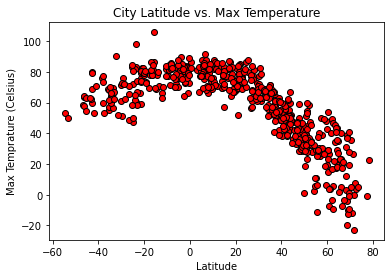

In [32]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values,y_values, marker = "o", facecolor = "red", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temprature (Celsius)')
plt.title("City Latitude vs. Max Temperature")

# Save the figure
plt.savefig("lat_temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

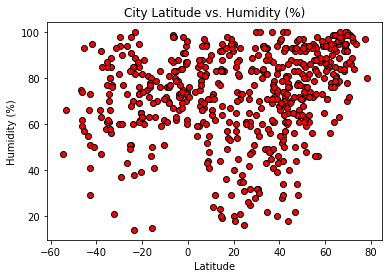

In [57]:
# Build scatter plot for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values, marker = "o", facecolor = "red", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity (%)")

# Save the figure
plt.savefig("lat_hum.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

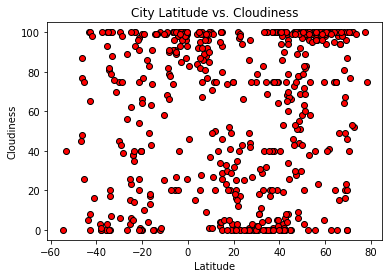

In [39]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values, marker = "o", facecolor = "red", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("City Latitude vs. Cloudiness")

# Save the figure
plt.savefig("lat_cloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

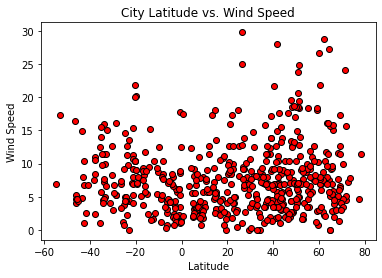

In [40]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values, marker = "o", facecolor = "red", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("City Latitude vs. Wind Speed")

# Save the figure
plt.savefig("lat_temp.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [51]:
# Define a function to create Linear Regression plots
def linear_regression_plot():
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(16,10),fontsize=15,color="red")
    plt.show()

In [52]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_hemi_df = pd.DataFrame(north)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,62.78,73,100,1.99,PT,1667886144
2,victoria,22.2855,114.1577,76.32,81,97,10.00,HK,1667886095
3,sarangani,5.4033,125.4636,83.91,68,95,3.09,PH,1667886145
4,liuzhou,24.3126,109.3892,86.16,31,25,0.38,CN,1667886037
5,albany,42.6001,-73.9662,46.36,61,6,7.00,US,1667886146


In [53]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south = city_data_df.loc[city_data_df["Lat"] <= 0]
southern_hemi_df = pd.DataFrame(south)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port alfred,-33.5906,26.8910,66.18,85,100,5.01,ZA,1667886145
6,saint-philippe,-21.3585,55.7679,80.19,76,26,11.34,RE,1667886146
7,poya,-21.3500,165.1500,76.15,85,97,10.76,NC,1667886146
9,kimbe,-5.5502,150.1429,83.52,80,91,4.56,PG,1667886147
10,hithadhoo,-0.6000,73.0833,82.60,74,26,17.76,MV,1667886147


###  Temperature vs. Latitude Linear Regression Plot

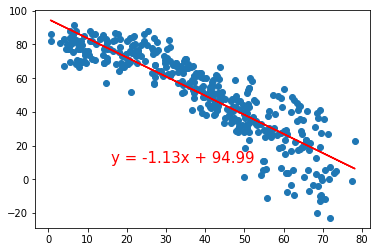

In [54]:
# Linear regression on Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Max Temp']).astype(float)

linear_regression_plot()

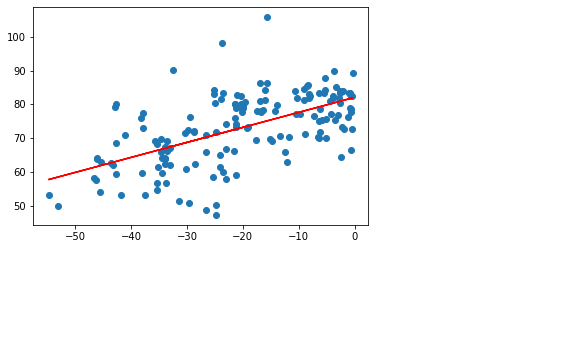

In [55]:
# Linear regression on Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Max Temp']).astype(float)

linear_regression_plot()

**Discussion about the linear relationship:** In the northern hemisphere there is a negative relationship between the max temperature and the latitude. As the Latitude increases as we move further away from the equator, the max temperature of cities decreases. 
In the southern hemisphere there is a positive relationship between the max temperature and the latitude. As the latitude increases and we move closer to the equator, the max temperature of cities also increases.

### Humidity vs. Latitude Linear Regression Plot

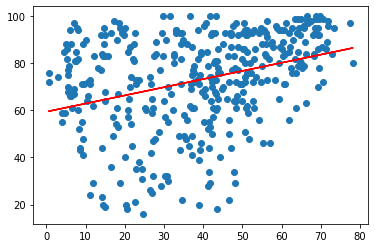

In [61]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Humidity']).astype(float)

linear_regression_plot()

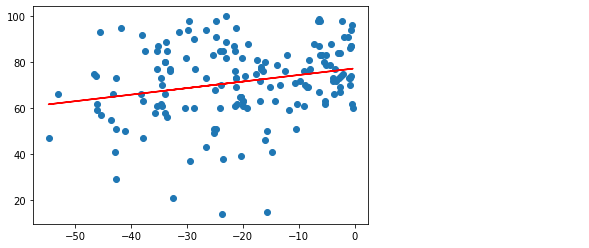

In [60]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Humidity']).astype(float)

linear_regression_plot()

**Discussion about the linear relationship:** There is a weak positive linear relationship between increasing latitude and humidity for both the southern and northern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

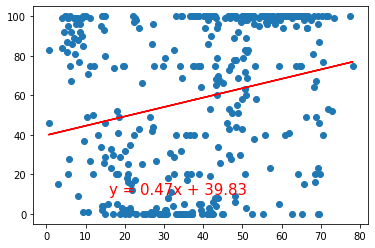

In [62]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Cloudiness']).astype(float)

linear_regression_plot()

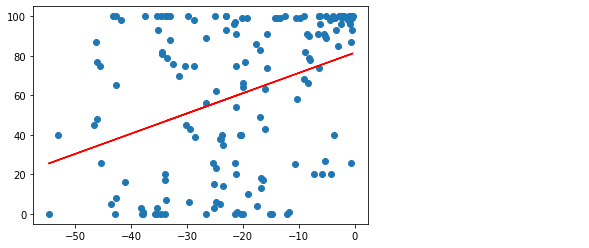

In [66]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Cloudiness']).astype(float)

linear_regression_plot()

**Discussion about the linear relationship:** Weak positive relationship between increasing latitude and increasing cloudiness in both hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

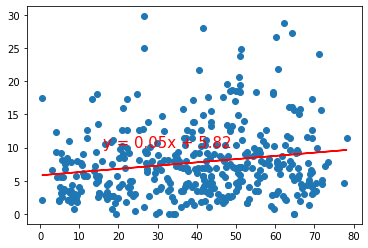

In [70]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Wind Speed']).astype(float)

linear_regression_plot()

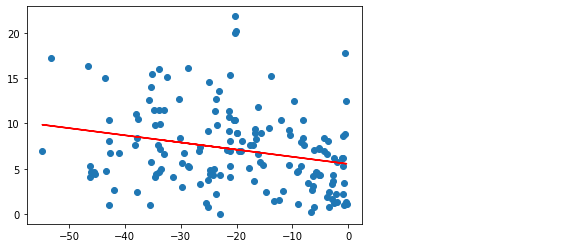

In [71]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Wind Speed']).astype(float)

linear_regression_plot()

**Discussion about the linear relationship:** In the Northern Hemisphere there is a weak positive linear relationship between latitude and wind speed. As the latitude increases away from the equator the wind spead increases slightly. In the southern hemisphere there is a weak negative linear relationship between latitude and wind speed. As the latitude increases towards the equator, the wind speed decreases.